In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# !pip install keras
# !pip install tensorflow

In [3]:
df = pd.read_csv('database/arquivo_finalizado.csv', index_col=0)

In [4]:
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
0,61.853,97.776,100.690,45.327,51.162,88.052,91.493,82.091,33.664,78.342,62.154,106.240,100.280,90.872,87.979,50.855,69.568,0
1,38.509,70.903,70.405,21.763,30.156,70.470,77.080,62.330,28.126,68.320,45.450,91.900,85.314,77.508,73.877,40.292,64.877,0
2,17.896,63.080,64.223,21.413,31.114,70.686,77.777,55.867,40.359,75.387,45.833,92.284,89.465,77.019,75.160,40.456,70.583,0
3,84.540,116.240,115.440,83.330,89.471,117.550,105.230,88.113,69.171,113.350,88.175,135.150,133.510,114.410,108.560,59.009,80.047,0
4,47.894,77.013,75.450,43.895,49.776,77.842,69.193,51.890,41.267,77.936,54.341,96.539,92.856,78.813,74.918,32.463,66.568,0


In [5]:
df[df['Classe'] == 1]

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
1446480,-6.49880,-17.5930,-6.68090,-2.3362,-0.48891,4.5754,-1.0643,-18.7860,4.2570,-7.8563,13.7220,8.4006,9.8469,14.5920,15.90200,7.2364,-27.2470,1
1446481,6.73660,-9.2918,0.19988,10.5520,10.90700,4.6759,-4.7353,-21.4430,8.5720,-2.7341,4.6525,7.2160,6.1745,9.1004,11.47200,-6.4878,-40.8000,1
1446482,-0.27389,-19.2660,-14.65300,-1.9268,-0.95725,-7.0057,-11.5670,-11.1860,1.1682,-12.2700,-10.5490,-7.2154,-8.1609,-4.2268,-2.13030,-14.5180,-43.2350,1
1446483,48.30900,19.9820,25.38400,40.7000,41.66600,22.4330,18.6130,14.1630,31.1350,24.2840,24.9020,20.5660,23.5400,25.4010,26.27700,14.1590,-37.1090,1
1446484,14.33200,-11.0600,-11.24700,20.3260,21.24700,-1.5655,-3.3407,-18.3730,17.9140,9.1402,-1.8249,-3.5196,-4.6464,2.7427,7.84640,-10.1330,-46.2330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892955,-6.23560,-17.0700,-10.30800,-5.4703,-1.81850,-2.2624,-15.2030,1.6293,-14.4420,22.4080,-17.3860,7.6387,12.6200,9.8743,0.20058,36.1010,-29.0040,1
2892956,-13.55200,-28.3450,-22.19000,-8.3131,-1.00650,-4.3221,-22.5820,-4.7541,-20.6770,15.9650,-24.1770,-11.5680,2.7696,-1.9585,-8.67060,48.4100,-35.6620,1
2892957,-13.16900,-16.6950,-9.83530,-11.0460,-0.75319,3.9594,-12.9210,8.0206,-19.9010,28.3290,-29.2090,-8.5594,12.3420,4.3143,-4.24020,29.5450,-21.0790,1
2892958,-3.18540,-2.6454,12.36300,-5.1238,2.08830,17.4410,0.8747,19.6870,-11.2730,34.2420,-21.6850,6.9356,21.4940,18.1600,9.23490,-2.3624,-1.4030,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5785920 entries, 0 to 5785919
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   E1      float64
 1   E2      float64
 2   E3      float64
 3   E4      float64
 4   E5      float64
 5   E6      float64
 6   E7      float64
 7   E8      float64
 8   E9      float64
 9   E10     float64
 10  E11     float64
 11  E12     float64
 12  E13     float64
 13  E14     float64
 14  E15     float64
 15  E16     float64
 16  E17     float64
 17  Classe  int64  
dtypes: float64(17), int64(1)
memory usage: 838.7 MB


In [7]:
df.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
count,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06
mean,-9.879507e+00,-8.814849e+00,-9.555520e+00,-7.941530e+00,-6.076094e+00,-3.943131e+00,-5.786126e+00,-7.555178e+00,-2.890368e+00,-3.461190e+00,-2.416732e+00,-2.355858e+00,-1.405622e+00,-1.585020e+00,-2.322477e+00,-2.522786e+00,-2.777557e+00,1.500000e+00
std,1.123877e+02,1.123163e+02,1.168969e+02,1.090756e+02,9.288788e+01,8.413306e+01,9.236491e+01,1.093582e+02,8.185803e+01,7.991500e+01,7.266843e+01,7.265652e+01,7.405938e+01,8.141009e+01,7.338193e+01,7.901800e+01,7.754108e+01,1.118034e+00
min,-1.586300e+03,-1.823500e+03,-1.649900e+03,-1.534700e+03,-1.427200e+03,-9.986900e+02,-1.341000e+03,-1.386500e+03,-1.064900e+03,-9.226500e+02,-9.164600e+02,-7.725300e+02,-1.548000e+03,-1.799500e+03,-1.067700e+03,-1.038000e+03,-9.764900e+02,0.000000e+00
25%,-4.447500e+01,-4.209000e+01,-4.438700e+01,-4.412000e+01,-3.799200e+01,-3.301300e+01,-3.641000e+01,-4.276900e+01,-3.335100e+01,-3.323025e+01,-2.943800e+01,-2.909100e+01,-2.752700e+01,-2.849000e+01,-2.881900e+01,-3.009000e+01,-2.975600e+01,7.500000e-01
50%,-5.707900e+00,-5.719550e+00,-6.046500e+00,-5.004600e+00,-4.656800e+00,-3.533100e+00,-4.217550e+00,-4.890700e+00,-3.275900e+00,-3.338400e+00,-2.517100e+00,-2.225350e+00,-2.025000e+00,-2.228200e+00,-2.436900e+00,-2.289100e+00,-2.529850e+00,1.500000e+00
75%,2.600600e+01,2.549100e+01,2.674600e+01,2.914900e+01,2.508200e+01,2.330200e+01,2.411900e+01,2.799600e+01,2.520200e+01,2.495200e+01,2.298100e+01,2.308300e+01,2.257600e+01,2.287800e+01,2.259800e+01,2.405300e+01,2.227500e+01,2.250000e+00
max,1.565000e+03,1.817300e+03,1.977400e+03,1.463200e+03,1.478100e+03,1.233800e+03,1.751500e+03,1.801800e+03,1.271000e+03,1.366500e+03,1.168500e+03,9.503100e+02,2.043300e+03,2.348600e+03,1.327000e+03,1.303700e+03,1.327300e+03,3.000000e+00


13776 inputs de uma série temporal para 105 séries temporais por classe

In [8]:
df.shape

(5785920, 18)

In [9]:
5785920/13776

420.0

In [10]:
def seccionar_dataframe(dataframe, intervalo):
    secoes = []
    num_linhas = len(dataframe)

    for i in range(0, num_linhas, intervalo):
        secao = dataframe.iloc[i:i+intervalo]
        secoes.append(secao)

    return secoes

def getFFT(secoes,fs=160):
    N = len(secoes)
    T = 1/fs
    t = np.arange(0,N/fs,T)
    f = np.fft.fftfreq(N,T)
    return np.abs(np.fft.fft(secoes))[f>0],f[f>0]

def plotFFT(secoes,fs=160):
    N = len(secoes)
    fft,f = getFFT(secoes,fs=160)
    plt.figure()
    plt.plot(f,fft*1/N)
    plt.show()

def getExamPosition(pessoa=1,tipe_exame=1):
    return ((105*(tipe_exame-1))+(pessoa-1))

# filtragem da rede (intervalo indicado é de 0.5 até 42.0 hz)
def filterMainVoltageNoise(fft,f,min=59.8,max=60.2):
    filtered = fft.copy()
    filtered[(f>min) & (f<max)] = 0
    return filtered


In [11]:
df['Classe'].astype('category')

0          0
1          0
2          0
3          0
4          0
          ..
5785915    3
5785916    3
5785917    3
5785918    3
5785919    3
Name: Classe, Length: 5785920, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [12]:
### CHOOSE ONE!


# Normalize data per user and per complete database.

# nao normalizaria pela pessoa (seja generico), normalizar pelo dataset ou nao normalizar paracem ser as respostas mais plausíveis, faça com quem não se torne um individuo
# nao utilizar os 17 eletrodos sao uma boa pista
# desvio padrão, max, min e mean são suficientes 

# ja sabe-se da literatura, 1 e 2 tem os eletrodos mais fortes. Ou 1 ou 2 é uma possibilidade de teste.

# person_df_list = []
# secoes_originais = seccionar_dataframe(df, 13776)
# for pessoa in range(105):
#     person_df = secoes_originais[getExamPosition(pessoa+1,1)]
#     for exame in range(1,4):
#         person_df = pd.concat([person_df,secoes_originais[getExamPosition(pessoa+1,exame+1)]])
#     #Normalizing per person, avoid person base level
#     person_df[person_df.columns.drop('Classe')] = (person_df[person_df.columns.drop('Classe')]-person_df[person_df.columns.drop('Classe')].min())/(person_df[person_df.columns.drop('Classe')].max()-person_df[person_df.columns.drop('Classe')].min())
#     person_df_list.append(person_df)
    
# df_per_person = pd.concat(person_df_list)
# df_per_person['Classe'] = df_per_person['Classe'].astype('category')
# #Normalizing over the entire Database to avoid a person specific spyke.
# normalized_df=(df_per_person[df_per_person.columns.drop('Classe')]-df_per_person[df_per_person.columns.drop('Classe')].min())/(df_per_person[df_per_person.columns.drop('Classe')].max()-df_per_person[df_per_person.columns.drop('Classe')].min())
# normalized_df['Classe'] = df_per_person['Classe']
# sorted_normalized_df = normalized_df.sort_index()
# secoes = seccionar_dataframe(sorted_normalized_df, 13776)

# ---------------------------------------------------------------------------------

# Normalization only on complete database



normalized_df=(df[df.columns.drop('Classe')]-df[df.columns.drop('Classe')].min())/(df[df.columns.drop('Classe')].max()-df[df.columns.drop('Classe')].min())
normalized_df['Classe'] = df['Classe']
secoes = seccionar_dataframe(normalized_df, 13776)

# ---------------------------------------------------------------------------------

# No normalization



# secoes = seccionar_dataframe(df, 13776)

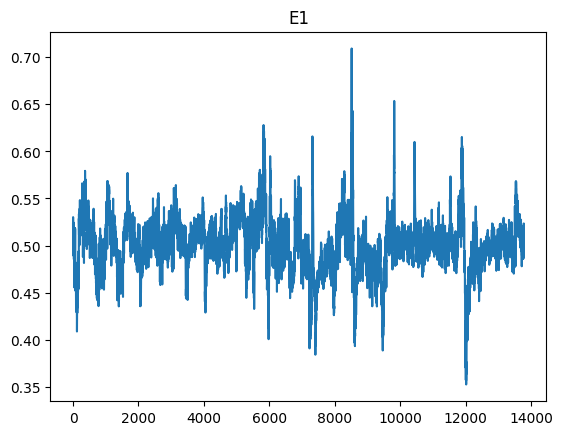

In [13]:

parametro = secoes[getExamPosition(1,1)]['E1']
plt.plot(parametro.index, parametro)
plt.title('E1')
plt.show()

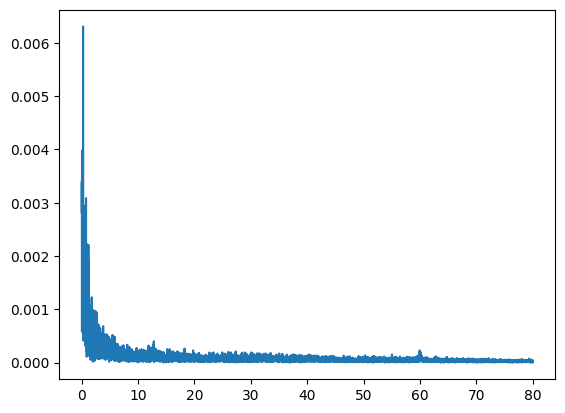

In [14]:
plotFFT(secoes[getExamPosition(1,1)]['E1'],fs=160)

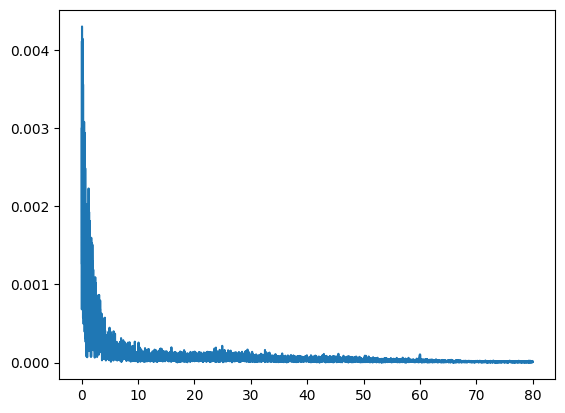

In [15]:
plotFFT(secoes[getExamPosition(105,4)]['E1'],fs=160)

In [16]:
min = 59.6
max = 60.4
N = len(secoes[300]['E1'])
fft,f = getFFT(secoes[300]['E1'])

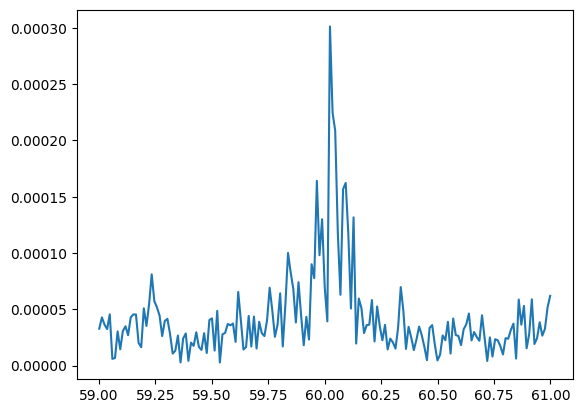

In [17]:
plt.figure()
plt.plot(f[f<61][f[f<61]>59],fft[f<61][f[f<61]>59]*1/N)

A seção 300,301,304,310 possui uma alta faixa de 60 hz em todos os sensores, indicando uma infiltração da rede. Como isso pode ser algo generalizado nos exames, pode ser importante realizar a filtragem dessas frequências.

In [18]:
# filtragem da rede
fft = filterMainVoltageNoise(fft,f)

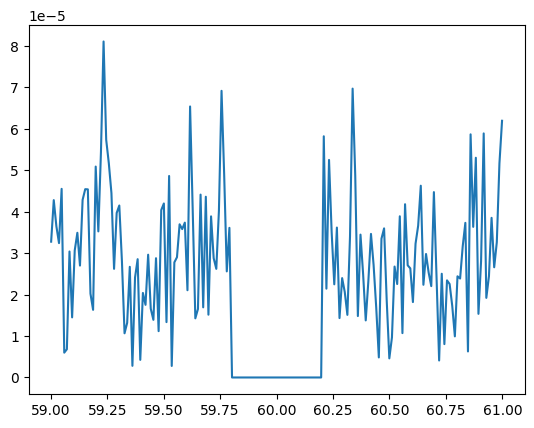

In [19]:
plt.figure()
plt.plot(f[f<61][f[f<61]>59],fft[f<61][f[f<61]>59]*1/N)

In [40]:
import numpy as np


def partition_and_calculate_stats(arrays, num_parts):
    result = []
    for arr in arrays:
        # Calculate the length of each partition
        partition_length = len(arr) // num_parts
        # Loop over each partition
        for i in range(num_parts):
            # Calculate the start and end index of this partition
            start = i * partition_length
            end = (i + 1) * partition_length if i < num_parts - 1 else len(arr)
            # Get the values for this partition
            partition_values = arr[start:end]
            # Calculate the mean, max, min, and standard deviation
            mean = np.mean(partition_values)
            max_value = np.max(partition_values)
            min_value = np.min(partition_values)
            std = np.std(partition_values)
            # Add the statistics to the dataframe
            result.append({'mean': mean, 'max': max_value, 'min': min_value, 'std': std})
    return result

In [21]:
def partition_and_calculate_mean(arrays, num_parts):
    result = []
    for arr in arrays:
        # Calculate the length of each partition
        partition_length = len(arr) // num_parts
        # Create a list to store the means for this array
        means = []
        # Loop over each partition
        for i in range(num_parts):
            # Calculate the start and end index of this partition
            start = i * partition_length
            end = (i + 1) * partition_length if i < num_parts - 1 else len(arr)
            # Calculate the mean of this partition
            mean = sum(arr[start:end]) / (end - start)
            means.append(mean)
        result.append(means)
    return result

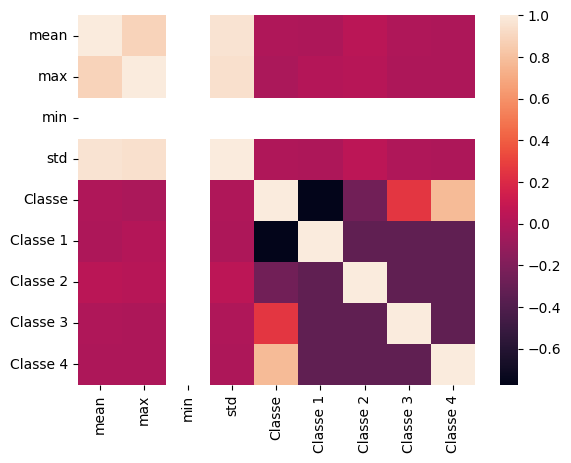

              mean       max  min       std    Classe  Classe 1  Classe 2   
mean      1.000000  0.883733  NaN  0.963231 -0.010978 -0.013087  0.038865  \
max       0.883733  1.000000  NaN  0.951187 -0.021756  0.009495  0.022944   
min            NaN       NaN  NaN       NaN       NaN       NaN       NaN   
std       0.963231  0.951187  NaN  1.000000 -0.011687 -0.016663  0.044646   
Classe   -0.010978 -0.021756  NaN -0.011687  1.000000 -0.774597 -0.258199   
Classe 1 -0.013087  0.009495  NaN -0.016663 -0.774597  1.000000 -0.333333   
Classe 2  0.038865  0.022944  NaN  0.044646 -0.258199 -0.333333  1.000000   
Classe 3 -0.010122 -0.018200  NaN -0.009126  0.258199 -0.333333 -0.333333   
Classe 4 -0.015656 -0.014239  NaN -0.018857  0.774597 -0.333333 -0.333333   

          Classe 3  Classe 4  
mean     -0.010122 -0.015656  
max      -0.018200 -0.014239  
min            NaN       NaN  
std      -0.009126 -0.018857  
Classe    0.258199  0.774597  
Classe 1 -0.333333 -0.333333  
Classe 2 -0.

In [68]:
classe = []
ffts = []
for i in secoes:
   fft,f = getFFT(i['E1'])
   fft = filterMainVoltageNoise(fft,f,min=0,max=0.5)
   fft = filterMainVoltageNoise(fft,f,min=42,max=100)
   classe.append(i.reset_index()['Classe'][0])
   ffts.append(fft)

stats_df = pd.DataFrame(partition_and_calculate_stats(ffts, 1))
stats_df['Classe'] = classe
stats_df['Classe 1'] = stats_df['Classe'] == 0
stats_df['Classe 2'] = stats_df['Classe'] == 1
stats_df['Classe 3'] = stats_df['Classe'] == 2
stats_df['Classe 4'] = stats_df['Classe'] == 3
corr_stats_df = stats_df.corr(method='pearson')
sns.heatmap(corr_stats_df)
plt.show()
print(corr_stats_df, "\n")



In [ ]:
dfs = []
for column in i.columns.drop('Classe'):
  classe = []
  ffts = []
  for i in secoes:
      sensor = []
      fft,_ = getFFT(i[column])
      sensor.extend(fft)
      classe.append(i.reset_index()['Classe'][0])
      ffts.append(fft*1/13776)

  dfs.append(pd.DataFrame(partition_and_calculate_mean(ffts, 5)))
 
mean_df = pd.concat(dfs, axis=1)


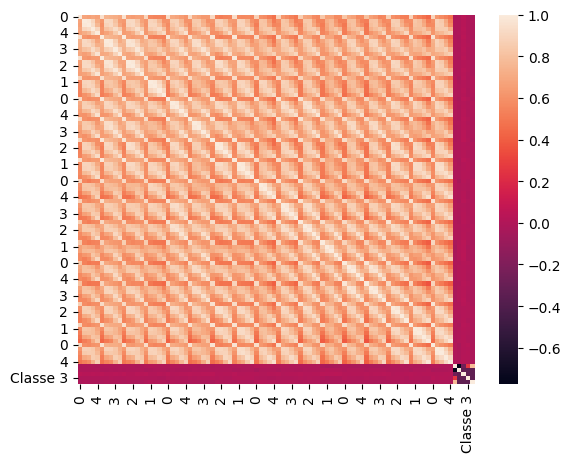

                 0         1         2         3         4         0   
0         1.000000  0.680906  0.656328  0.681970  0.667059  0.951048  \
1         0.680906  1.000000  0.985195  0.898221  0.715515  0.613115   
2         0.656328  0.985195  1.000000  0.929936  0.760071  0.588753   
3         0.681970  0.898221  0.929936  1.000000  0.896968  0.615372   
4         0.667059  0.715515  0.760071  0.896968  1.000000  0.617806   
...            ...       ...       ...       ...       ...       ...   
Classe   -0.016601 -0.006125 -0.009261 -0.011272 -0.014318 -0.011147   
Classe 1 -0.010489 -0.008280 -0.005920 -0.009059 -0.004600 -0.016337   
Classe 2  0.042180  0.025664  0.023669  0.032741  0.029476  0.040956   
Classe 3 -0.010029 -0.010675 -0.005666 -0.009202 -0.008182 -0.004119   
Classe 4 -0.021662 -0.006710 -0.012082 -0.014480 -0.016694 -0.020500   

                 1         2         3         4  ...         0         1   
0         0.738980  0.723392  0.715314  0.685455  ...  0.8

In [ ]:

mean_df['Classe'] = classe
mean_df['Classe 1'] = mean_df['Classe'] == 0
mean_df['Classe 2'] = mean_df['Classe'] == 1
mean_df['Classe 3'] = mean_df['Classe'] == 2
mean_df['Classe 4'] = mean_df['Classe'] == 3
corr_mean_df = mean_df.corr()
sns.heatmap(corr_mean_df)
plt.show()
print(corr_mean_df, "\n")

In [69]:
mean_df

NameError: name 'mean_df' is not defined

In [ ]:
mean_df.columns = [10, 11, 12, 13, 14,
                    20, 21, 22, 23, 24, 
                    30, 31, 32, 33, 34, 
                    40, 41, 42, 43, 44, 
                    50, 51, 52, 53, 4,
                    60, 61, 62, 63, 64,
                    70, 71, 72, 73, 74, 
                    80, 81, 82, 83, 84, 
                    90, 91, 92, 93, 94, 
                    100, 101, 102, 103, 104, 
                    110, 111, 112, 113, 114, 
                    120, 121, 122, 123, 124, 
                    130, 131, 132, 133, 134, 
                    140, 141, 142, 143, 144, 
                    150, 151,152, 153, 154, 
                    160, 161, 162, 163, 164, 
                    170, 171, 172, 173, 174,
                    'Classe','Classe 1','Classe 2','Classe 3','Classe 4']

In [ ]:
# train_df, test_df, train_target,test_target = train_test_split(mean_df[mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])], mean_df['Classe'], test_size=0.1, random_state=42)
train_df, test_df, train_target,test_target = train_test_split(mean_df[mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])], mean_df['Classe 1'], test_size=0.1, random_state=42)
# train_df, test_df, train_target,test_target = train_test_split(mean_df[mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])], mean_df['Classe 2'], test_size=0.1, random_state=42)
# train_df, test_df, train_target,test_target = train_test_split(mean_df[mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])], mean_df['Classe 3'], test_size=0.1, random_state=42)
# train_df, test_df, train_target,test_target = train_test_split(mean_df[mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])], mean_df['Classe 4'], test_size=0.1, random_state=42)


In [ ]:
mean_df.columns.drop(['Classe','Classe 1','Classe 2','Classe 3','Classe 4'])

Index([ 10,  11,  12,  13,  14,  20,  21,  22,  23,  24,  30,  31,  32,  33,
        34,  40,  41,  42,  43,  44,  50,  51,  52,  53,   4,  60,  61,  62,
        63,  64,  70,  71,  72,  73,  74,  80,  81,  82,  83,  84,  90,  91,
        92,  93,  94, 100, 101, 102, 103, 104, 110, 111, 112, 113, 114, 120,
       121, 122, 123, 124, 130, 131, 132, 133, 134, 140, 141, 142, 143, 144,
       150, 151, 152, 153, 154, 160, 161, 162, 163, 164, 170, 171, 172, 173,
       174],
      dtype='object')

In [70]:
classe = []
ffts = []
for i in secoes:
   fft,f = getFFT(i['E1'])
   fft = filterMainVoltageNoise(fft,f,min=0,max=0.5)
   fft = filterMainVoltageNoise(fft,f,min=42,max=100)
   classe.append(i.reset_index()['Classe'][0])
   ffts.append(fft)

stats_df = pd.DataFrame(partition_and_calculate_stats(ffts, 1))
stats_df['Classe'] = classe
stats_df['Classe 1'] = stats_df['Classe'] == 0
stats_df['Classe 2'] = stats_df['Classe'] == 1
stats_df['Classe 3'] = stats_df['Classe'] == 2
stats_df['Classe 4'] = stats_df['Classe'] == 3

In [71]:
stats_df

,mean,max,min,std,Classe,Classe 1,Classe 2,Classe 3,Classe 4
0,0.946659,42.540574,0.0,2.189131,0,True,False,False,False
1,0.330110,7.935320,0.0,0.599799,0,True,False,False,False
2,2.381794,86.847634,0.0,5.520427,0,True,False,False,False
3,0.392051,11.552599,0.0,0.781168,0,True,False,False,False
4,0.411973,5.825254,0.0,0.641730,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...
415,0.808632,27.648952,0.0,2.049942,3,False,False,False,True
416,1.316631,45.949041,0.0,3.170898,3,False,False,False,True
417,0.915211,19.118008,0.0,1.416243,3,False,False,False,True
418,1.843753,47.818477,0.0,3.733118,3,False,False,False,True


In [58]:
train_df, test_df, train_target, test_target  = train_test_split(stats_df[['mean','max','min','std']], 
                                                    stats_df[['Classe 1','Classe 2'
                                                              
                                                        #        ,'Classe 3','Classe 4'
                                                            ]], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [59]:
model = Sequential()
model.add(Dense(units = 15, activation = 'relu', input_dim = 4))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                  metrics = ['categorical_accuracy'])

model.summary()

model.fit(
    train_df, train_target,
    epochs=3000,
    batch_size=40
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                75        
                                                                 
 dense_20 (Dense)            (None, 15)                240       
                                                                 
 dense_21 (Dense)            (None, 2)                 32        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
8/8 [==============================] - 1s 2ms/step - loss: 0.3729 - categorical_accuracy: 0.4490
Epoch 2/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4868 - categorical_accuracy: 0.7245
Epoch 3/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4989 - categorical_accurac

In [60]:
score = model.evaluate(test_df, test_target)

4/4 [==============================] - 0s 2ms/step - loss: 35.9206 - categorical_accuracy: 0.7857


In [62]:
train_df, test_df, train_target, test_target  = train_test_split(stats_df[['mean','max','min','std']], 
                                                    stats_df[[
                                                        # 'Classe 1','Classe 2'
                                                              
                                                        #        ,
                                                        'Classe 3','Classe 4'
                                                            ]], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [66]:
model = Sequential()
model.add(Dense(units = 15, activation = 'relu', input_dim = 4))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                  metrics = ['categorical_accuracy'])

model.summary()

model.fit(
    train_df, train_target,
    epochs=3000,
    batch_size=40
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 15)                75        
                                                                 
 dense_26 (Dense)            (None, 15)                240       
                                                                 
 dense_27 (Dense)            (None, 2)                 32        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
8/8 [==============================] - 1s 2ms/step - loss: 0.9331 - categorical_accuracy: 0.3980
Epoch 2/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3788 - categorical_accuracy: 0.6259
Epoch 3/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4320 - categorical_accurac

In [67]:
score = model.evaluate(test_df, test_target)

4/4 [==============================] - 0s 2ms/step - loss: 267.4206 - categorical_accuracy: 0.2857


In [72]:
train_df, test_df, train_target, test_target  = train_test_split(stats_df[['mean','max','min','std']], 
                                                    stats_df[['Classe 1','Classe 2'
                                                              
                                                        #        ,'Classe 3','Classe 4'
                                                            ]], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [76]:
model = Sequential()
model.add(Dense(units = 15, activation = 'relu', input_dim = 4))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                  metrics = ['categorical_accuracy'])

model.summary()

model.fit(
    train_df, train_target,
    epochs=3000,
    batch_size=40
)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 15)                75        
                                                                 
 dense_32 (Dense)            (None, 15)                240       
                                                                 
 dense_33 (Dense)            (None, 2)                 32        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
8/8 [==============================] - 1s 2ms/step - loss: 4.2004 - categorical_accuracy: 0.2653
Epoch 2/3000
8/8 [==============================] - 0s 2ms/step - loss: 2.9824 - categorical_accuracy: 0.2653
Epoch 3/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.7441 - categorical_accurac

In [77]:
score = model.evaluate(test_df, test_target)

4/4 [==============================] - 0s 2ms/step - loss: 28.3294 - categorical_accuracy: 0.7857


In [78]:
score = model.evaluate(train_df, train_target)

10/10 [==============================] - 0s 2ms/step - loss: 37.8002 - categorical_accuracy: 0.7347


In [79]:
class_predict = [np.argmax(t) for t in test_target]
predict = [np.argmax(t) for t in test_predictions]